## Bank Marketing Campaign Clustering

Porimol Chandro \
1st Year Master's Student of Data Science and Business Analytics \
Faculty of Economic Sciences, University of Warsaw

## Table of contents

1. Motivation(What Drives My Project Interest?)
2. Import required python packages
3. Dataset information
4. Load dataset
5. Exploratory Data Analysis(EDA)
    - The search for missings and duplicates
    - Get list of categorical and numerical variables
    - Check unique value of each categorical features
    - Ploting the frequency values of categorical and numerical features
6. Selecting the appropriate features
    - One-hot encoding and scaling the features
    - MinMaxScaler
7. Clustering
    - Find the k based on elbow analysis
    - KMeans clustering
    - Distribution of the clusters
8. Dimensionality reduction using PCA and evaluation of the considered clustering algorithm
9. Exploring the data by cluster
10. Conclusion

## Motivation(What Drives My Project Interest?)

Over the years, the growing number of marketing campaigns has decreased their influence on a broader demographic.  Marketing managers are also being driven by competitive and economic forces to concentrate on carefully chosen contacts and targeted initiatives.  By using techniques from the domains of business intelligence (BI) and data mining (DM), these direct initiatives can be significantly more successful.

In my clustering anlysis I used Portuguese banking customers datasets. The bank marketing dataset was first introduced in the work of Moro, S., Laureano, R., and Cortex, P. (2011). This dataset concerns phone-based direct marketing campaigns carried out by a Portuguese financial organisation. Predicting whether a client will sign up for a term deposit was the classification task for which the dataset was used in the original research. The characteristics that were employed included specific socioeconomic statistics, specifics about marketing initiatives, and bank clientele.

My analysis is limited to the bank client data in an attempt to group clients into different segments. When developing marketing strategies, financial institutions should consider the results of this kind of analysis. Through understanding different customer segments, banks are able to customise advertising to specifically target each group.

## Importing required Python packages

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

## Dataset Information

The dataset I use is contained banking customers(https://archive.ics.uci.edu/dataset/222/bank+marketing) only.

In the following table I description all of the feature variables name, data type, demographic and description of each variable.

|Feature Name|Data Type|Is Demographic|Description|
|---|---|---|---|
|age|int64|Yes||
|job|object|Yes|type of job (categorical: `management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student`)|
|marital|object|Yes|marital status (categorical: `married, single, divorced`)	|
|education|object|Yes|(categorical: `tertiary, secondary, unknown, primary`)|
|default|object|No|has credit in default? binary: `no, yes`|
|balance|int64|No|average yearly balance, binary: `no, yes`|
|housing|object|No|has housing loan? binary: `no, yes`|
|loan|object|No|has personal loan? binary: `no, yes`|
|contact|object|No|contact communication type (categorical: `unknown, cellular, telephone`)	|
|day|int64|No|last contact day of the week.|
|month|object|No|last contact month of year (categorical: `jan, feb, mar,....nov, dec`)|
|duration|int64|No|last contact duration, in seconds (numeric).|
|campaign|int64|No|number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|pdays|int64|No|number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)|
|previous|int64|No|number of contacts performed before this campaign and for this client|
|poutcome|object|No|outcome of the previous marketing campaign (categorical: `unknown, failure, other, success`)|
|y|object|No|has the client subscribed a term deposit? binary: `no, yes`|

## Load dataset

Loading the dataset using Pandas packages.

In [41]:
df = pd.read_csv('datasets/bank-full.csv', sep=';')

Displaying the shape of the dataset

In [42]:
df.shape

(45211, 17)

Showing the first 5 rows of the dataset for a quick overview.

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Here I will only keep only the 8 variables related to bank client data and exclude other variables from this analysis.

|Feature Name|Data Type|Is Demographic|Description|
|---|---|---|---|
|age|int64|Yes||
|job|object|Yes|type of job (categorical: `management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student`)|
|marital|object|Yes|marital status (categorical: `married, single, divorced`)	|
|education|object|Yes|(categorical: `tertiary, secondary, unknown, primary`)|
|default|object|No|has credit in default? binary: `no, yes`|
|balance|int64|No|average yearly balance, binary: `no, yes`|
|housing|object|No|has housing loan? binary: `no, yes`|
|loan|object|No|has personal loan? binary: `no, yes`|

In [44]:
selected_cols = list(df.iloc[:, :8].columns)

In [45]:
df = df[selected_cols]

In [46]:
df.shape

(45211, 8)

We keep only the variables related to bank client data:

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


## Exploratory Data Analysis(EDA)

Portuguese banking client datasets require exploratory data analysis (EDA) since it can be used to find patterns, spot variations in the data, and demonstrate relationships. This knowledge is essential for making well-informed decisions in field marketing campaign, since it ensures customised tactics for a wide range of customer needs.

### The search for missings and duplicates

In order to, get a full undersstanding of what steps should I be taking to clean the dataset. I look at the information in data.

Checking the data types of the each column in our datasets

In [48]:
df.duplicated().value_counts()

False    41048
True      4163
Name: count, dtype: int64

In [49]:
df.drop_duplicates(inplace=True)

Based on the above output, here are no duplicates value in the dataset.

Check the percentage of missing values in the dataset

In [50]:
df.isnull().sum()*100/df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
dtype: float64

There are no NULL values in the dataset, hence it is clean.

Checking the data types and others information of the each column in our datasets.

Information of each feature as follows.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41048 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41048 non-null  int64 
 1   job        41048 non-null  object
 2   marital    41048 non-null  object
 3   education  41048 non-null  object
 4   default    41048 non-null  object
 5   balance    41048 non-null  int64 
 6   housing    41048 non-null  object
 7   loan       41048 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


**From the above exploratory output, I can conclude and note that:**

- There are no missing values in the dataset
- There are two integer variables and rest of the variable are categorical in the dataset; as there are most of the features in dtype: `object`. So I will use encoding method to encode those feature from categorical values into numeric forms.


### Get list of categorical and numerical variables

In [52]:
num_feats = (df.dtypes != 'object')
num_feats = list(num_feats[num_feats].index)

cat_feats = (df.dtypes == 'object')
cat_feats = list(cat_feats[cat_feats].index)

print(f"Numerical features: {num_feats} \nCategorical features: {cat_feats}")

Numerical features: ['age', 'balance'] 
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan']


### Check unique value of each categorical features

In [53]:
for col in cat_feats:
    print(f'{col}:')
    print(df[col].unique())
    print('\n')

job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital:
['married' 'single' 'divorced']


education:
['tertiary' 'secondary' 'unknown' 'primary']


default:
['no' 'yes']


housing:
['yes' 'no']


loan:
['no' 'yes']




### Ploting the frequency values of categorical features

Understanding the dominating and uncommon categories in the dataset is made easier by plotting the frequency values of categorical characteristics, which offers an illustration of the distribution of various categories.

Understanding the variety of categorical data and making data-driven decisions are made easier with the help of this visualisation, particularly when it comes to targeted marketing and market segmentation.

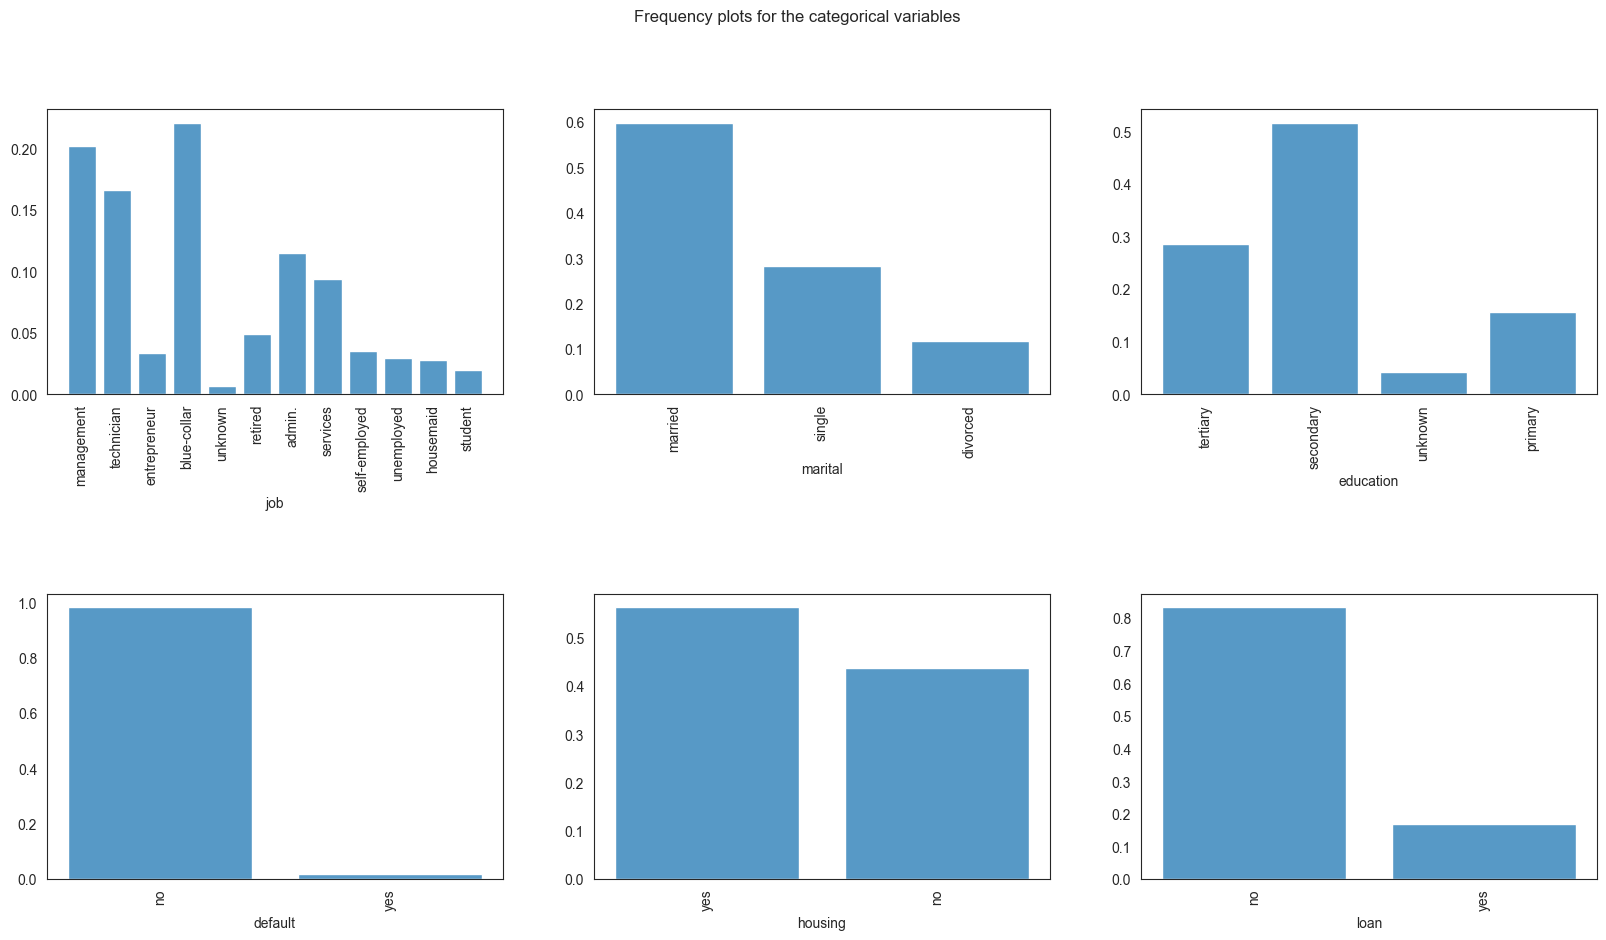

In [54]:
sns.set_style('white')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = df['job'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,0])
axs[0,0].set_xticklabels(list(df['job'].unique()), rotation = 90)

sns.histplot(x = df['marital'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,1])
axs[0,1].set_xticklabels(list(df['marital'].unique()), rotation = 90)

sns.histplot(x = df['education'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,2])
axs[0,2].set_xticklabels(list(df['education'].unique()), rotation = 90)

sns.histplot(x = df['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,0])
axs[1,0].set_xticklabels(list(df['default'].unique()), rotation = 90)

sns.histplot(x = df['housing'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,1])
axs[1,1].set_xticklabels(list(df['housing'].unique()), rotation = 90)

sns.histplot(x = df['loan'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,2])
axs[1,2].set_xticklabels(list(df['loan'].unique()), rotation = 90)

plt.suptitle('Frequency plots for the categorical variables')

for ax in axs.ravel():
    ax.set_ylabel('')

plt.show()

We see that most of the bank's clients are mamagement, blue-collar and the lowest portion of clients are unknownd and students. Most of the clients are married and single, have tertiary or primary education, have no credit in default or personal loans. The proportion of clients with and without housing loans is roughly similar.

### Ploting the frequency values of numerical features

Visualizing the distribution of bank clients' ages:

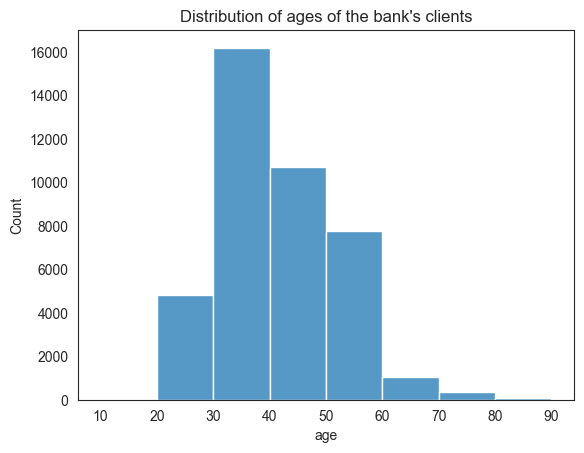

In [55]:
sns.histplot(data=df, x='age', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title("Distribution of ages of the bank's clients")
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.ylabel('Count')
plt.show()

Most of the bank's clients are between 30 to 40 years of age.

Visualizing the distribution of bank balances:

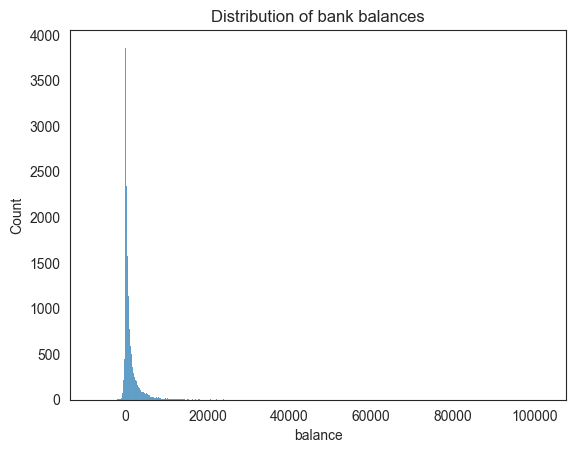

In [56]:
sns.histplot(data=df, x='balance')
plt.title("Distribution of bank balances")
plt.ylabel('Count')
plt.show()

Based on the balance visualization, we can say that the bank balances are positively skewed, with most clients having less than 10,000 euros and some having a lot more.

## Selecting the appropriate features

One of the most important steps in the data analysis process is choosing the right features, which entails finding and including pertinent variables that significantly advance the analysis or model. By improving interpretability, dimensionality reduction, and model performance, this procedure should eventually result in more effective and efficient decision-making based on the selected features. 

## One-hot encoding and scaling the features

Essential preprocessing procedures in data analysis and machine learning are one-hot encoding and feature scaling. To properly comprehend and handle categorical information, one-hot encoding is utilised to transform them into a binary matrix format. However, scaling ensures that variables with different scales do not significantly influence the model, leading to improved convergence and performance in machine learning algorithms. Scaling includes normalising numerical features to a standard range. When combined, these preprocessing methods let models handle a variety of data formats with greater accuracy and efficiency.

In [57]:
one_df = pd.get_dummies(df, drop_first=True)

In [58]:
one_df.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,58,2143,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,44,29,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
2,33,2,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,True
3,47,1506,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,33,1,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False


### MinMaxScaler

A popular normalisation method for preparing data for machine learning is MinMaxScaler. By converting each value proportionately depending on the lowest and greatest values in the dataset, it scales numerical features to a given range, usually between 0 and 1. By doing this, you can make sure that every feature has the same scale and stop larger-magnitude variables from controlling the learning process.

By bringing all characteristics into a uniform range, MinMaxScaler is especially helpful for algorithms that are sensitive to the scale of input features. This improves model performance and convergence.

In [59]:
scaler = MinMaxScaler()
df_kmeans = scaler.fit_transform(one_df)

In [60]:
df_kmeans = pd.DataFrame(df_kmeans, columns=one_df.columns)

In [61]:
df_kmeans.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,0.519481,0.092259,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.337662,0.073067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.194805,0.072822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.376623,0.086476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.194805,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Clustering

As an aspect of an analysis of data called clustering, related data points are grouped together based on shared traits or attributes. Clustering is crucial to data analysis as it reveals hidden structures, relationships, and patterns in a dataset. Through the process of establishing logical groupings of data points, clustering offers valuable insights into the underlying structure of the data, hence promoting a more profound comprehension of intricate interactions between variables.

For instance, in customer segmentation for a Portuguese banking dataset, clustering can help categorize clients into distinct groups based on their banking behavior, preferences, or demographics. This information is valuable for tailoring marketing strategies, designing personalized services, and optimizing customer experiences. Overall, clustering enhances the interpretability of data, aids in uncovering meaningful insights, and supports informed decision-making in various analytical domains.

## Find the k based on elbow analysis

Calculate elbow scores for different cluster numbers

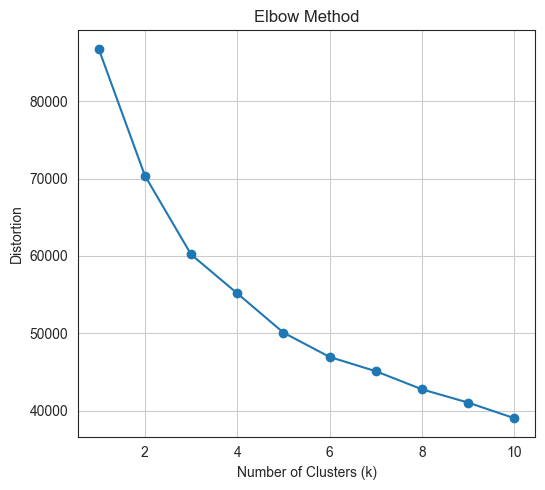

In [62]:
# Define a function to plot the elbow
max_clusters = 10
elbow_scores = []
silhouette_scores = []

# Calculate distortions and silhouette scores for different cluster numbers
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(df_kmeans)
    elbow_scores.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score is not defined for a single cluster
        silhouette_scores.append(silhouette_score(df_kmeans, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, max_clusters + 1), elbow_scores, marker='o')
# plt.axvline(4, linestyle='--', c='r')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.grid(True)

plt.tight_layout()
plt.show()


We can choose the optimal number of clusters using the so-called elbow method, where we look for an `elbow` in the inertia plot, i.e., a point after which the drop in inertia becomes abruptly becomes more gradual. Hence, by the elbow method, 3 clusters would be chosen.

### KMeans clustering

A common unsupervised machine learning technique for grouping a dataset into independent, non-overlapping groups or clusters is KMeans clustering. Transferring data points to clusters iteratively and optimising cluster centroids until convergence is how the method operates. Its goal is to cluster together comparable data points by minimising the within-cluster sum of squared distances.

Choosing a right K for KMeans clustering is one of the crucial and difficult task for clustering. In this case we can use Elbow score to determine the right K for the KMeans clustering.

Above visualization showing that for our Bank Marketing datasets the optimal K is 3.

In [63]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)

In [64]:
kmeans_clusters = kmeans.fit_predict(df_kmeans)

In [65]:
kmeans_clusters

array([1, 2, 0, ..., 2, 0, 0], dtype=int32)

In [66]:
df_kmeans.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,0.519481,0.092259,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.337662,0.073067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.194805,0.072822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.376623,0.086476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.194805,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
df_kmeans['cluster_k-means'] = kmeans_clusters

In [68]:
df_kmeans.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,cluster_k-means
0,0.519481,0.092259,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,0.337662,0.073067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,0.194805,0.072822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,0.376623,0.086476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.194805,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [69]:
df_kmeans['cluster_k-means'].value_counts()

cluster_k-means
0    18216
1    11966
2    10866
Name: count, dtype: int64

### Distribution of the clusters

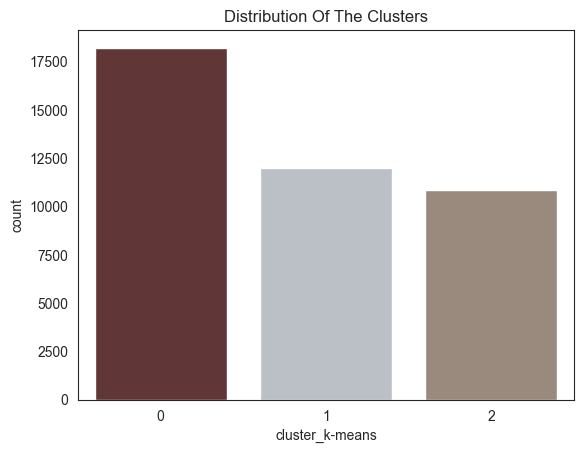

In [70]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_kmeans["cluster_k-means"], palette=pal, legend=True)
pl.set_title("Distribution Of The Clusters")
plt.show()

The chart shows the distribution of customers in different clusters.

The most populous cluster is cluster 0 with 15,000 customers. Cluster 1 has 10,000 customers, cluster 2 has 5000 customers, and cluster 3 has 0 customers.

## Dimensionality reduction using PCA and evaluation of the considered clustering algorithm

Dimensionality reduction enhances data analysis by transforming high-dimensional data into a lower-dimensional space in this experiment I am going to obtain a 2-dimensional representation of the features, retaining the most relevant information while reducing computational complexity. Principal Component Analysis (PCA) is a popular dimensionality reduction technique that identifies the principal components, which are linear combinations of the original variables that capture the most variance in the data.

 Clustering algorithms group similar data points into clusters, helping identify patterns and relationships within the data. Evaluating clustering algorithms involves assessing their ability to group data points effectively, often using metrics like silhouette score, which measures how well data points belong to their respective clusters.

 In summary, dimensionality reduction using PCA can improve data analysis, and evaluating clustering algorithms ensures their effectiveness in identifying meaningful patterns and groups within the data.

In [71]:
pca = PCA(2)
pca_df = pd.DataFrame(pca.fit_transform(df_kmeans), columns=['pca0', 'pca1'])

In [72]:
pca_df.head()

,pca0,pca1
0,-0.021975,1.092835
1,1.460154,-0.805355
2,-1.000331,-0.497294
3,-1.056452,-0.007456
4,1.475213,0.107732


In [73]:
explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
print(f'Proportion of variance of the original features explained by the first two principal components: {explained_variance_ratio}')

Proportion of variance of the original features explained by the first two principal components: 0.5167716710802361


In [74]:
pca_df['cluster_k-means'] = kmeans_clusters

In [75]:
pca_df.head()

,pca0,pca1,cluster_k-means
0,-0.021975,1.092835,1
1,1.460154,-0.805355,2
2,-1.000331,-0.497294,0
3,-1.056452,-0.007456,0
4,1.475213,0.107732,2


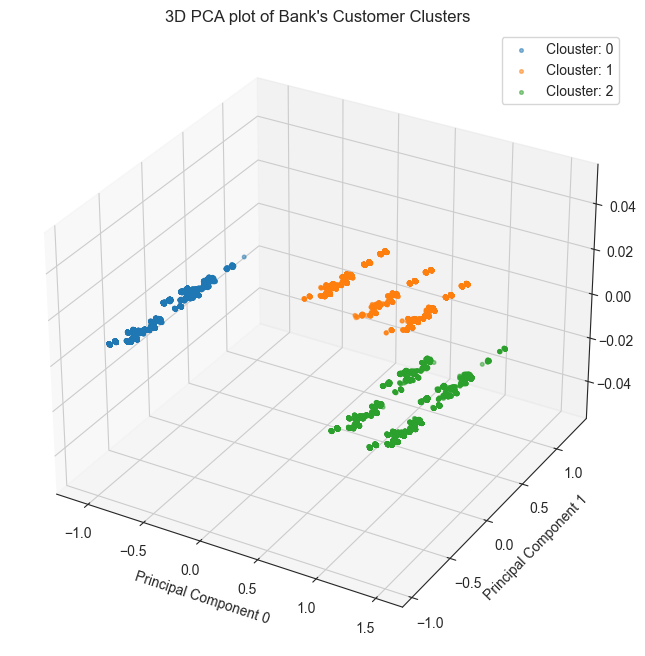

In [76]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")
for cluster_num in np.unique(kmeans_clusters):
    ax.scatter(pca_df[kmeans_clusters == cluster_num]['pca0'],
               pca_df[kmeans_clusters == cluster_num]['pca1'],
               label=f"Clouster: {cluster_num}",
               s=7,
               alpha=0.5,
               marker='o',)
plt.title("3D PCA plot of Bank's Customer Clusters")
plt.xlabel("Principal Component 0")
plt.ylabel("Principal Component 1")
plt.legend()
plt.show()

As we can see that the KMeans produced well-seperated clusters on the first two principal components. It must be noted, however, that analysis based on the first two principal components. The x-axis represents the first principal component (PC1), the y-axis represents the second principal component (PC2), and the z-axis represents the third principal component (PC3).

The data points are colored by cluster, with cluster 0 in blue, cluster 1 in green, and cluster 2 in red.

As can be seen from the plot, the three clusters appear to be well-separated. This suggests that the PCA transformation has been successful in identifying the underlying structure of the data.

The average silhouette score for the three clusters is 0.42, which is considered to be a good score. This suggests that the clustering algorithm has been successful in identifying groups of customers that are similar to each other.

## Exploring the data by cluster

In [77]:
df.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [78]:
df['cluster_k-means'] = kmeans_clusters

In [79]:
df.head()

,age,job,marital,education,default,balance,housing,loan,cluster_k-means
0,58,management,married,tertiary,no,2143,yes,no,1
1,44,technician,single,secondary,no,29,yes,no,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,0
3,47,blue-collar,married,unknown,no,1506,yes,no,0
4,33,unknown,single,unknown,no,1,no,no,2


Exploring individual variable by cluster.

Plotting frequency plots for the variable `job`, by cluster:

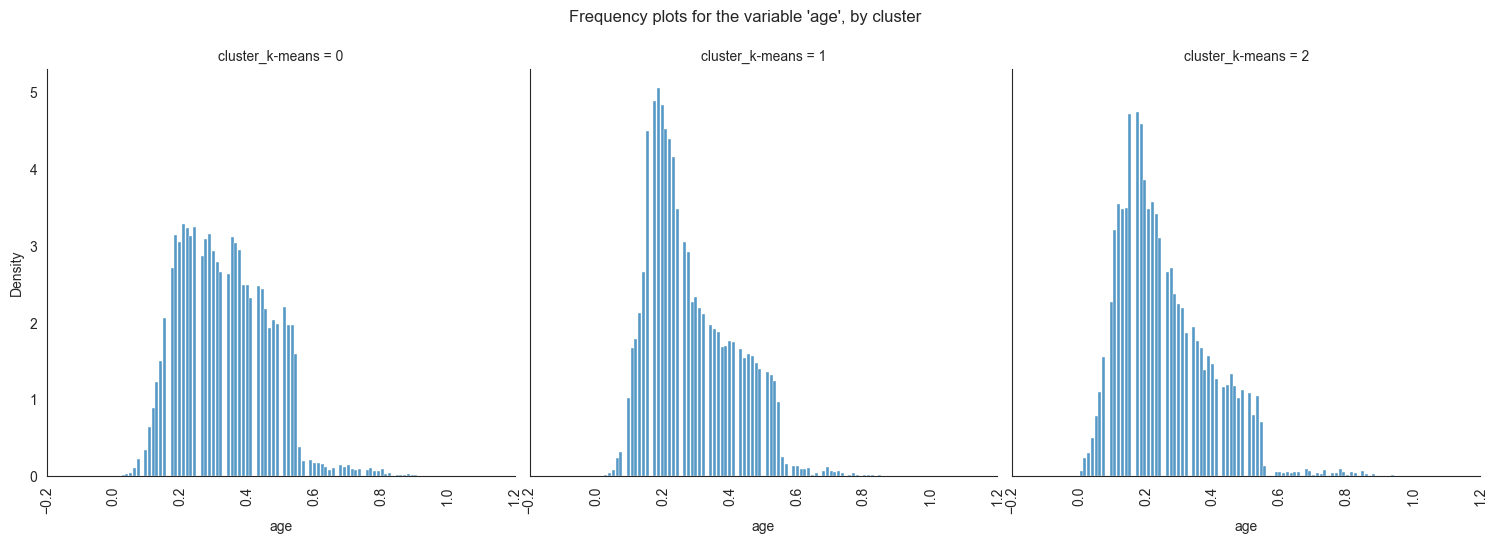

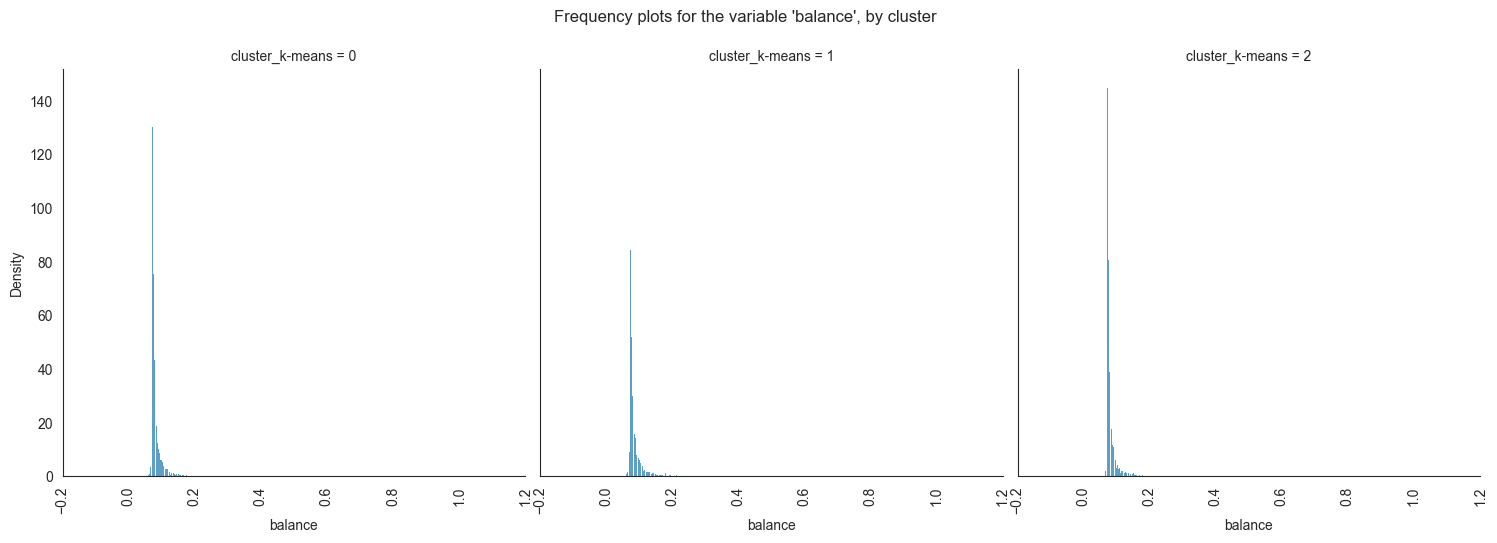

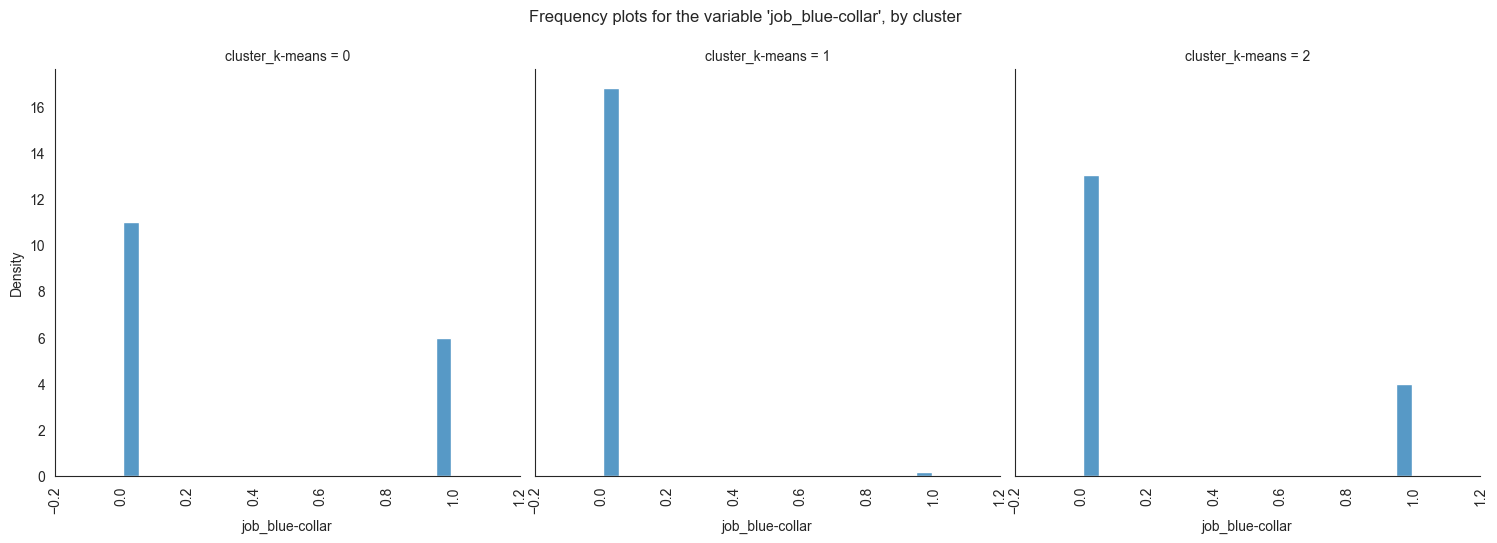

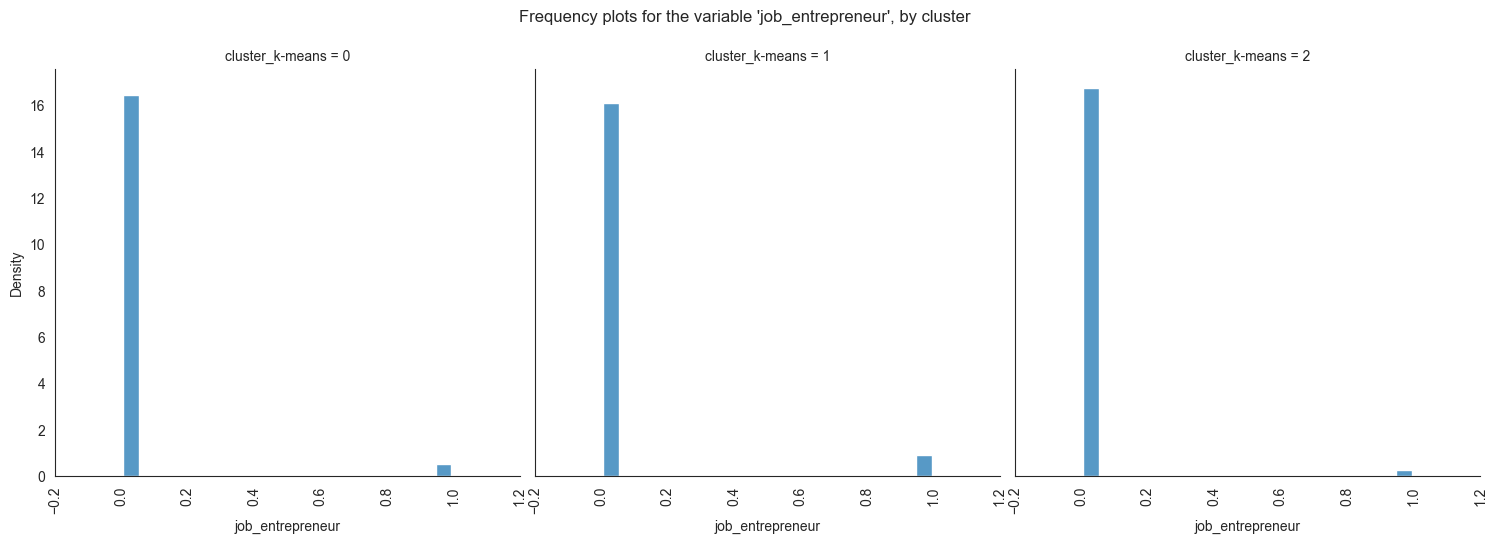

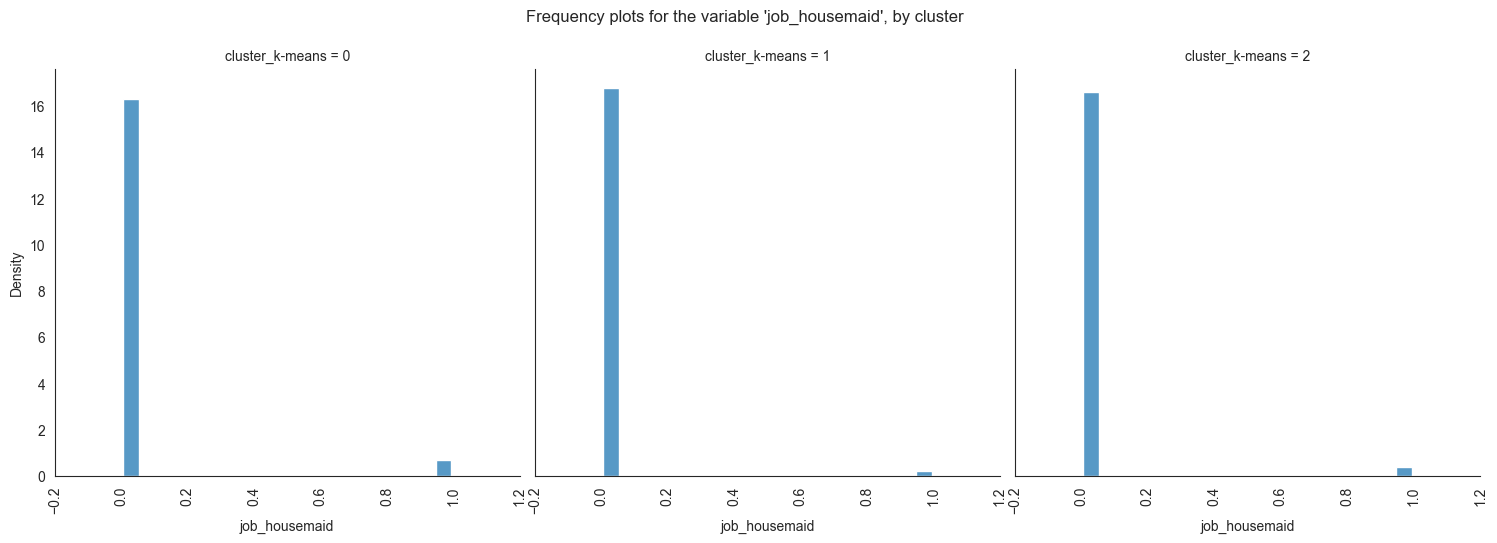

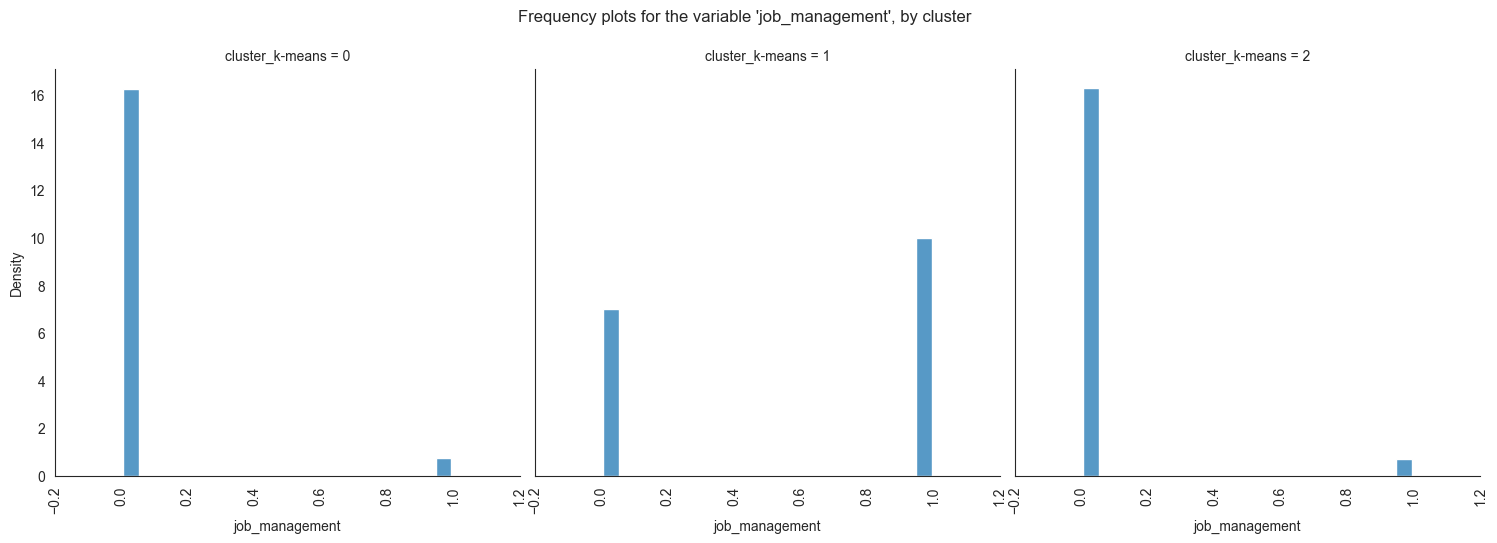

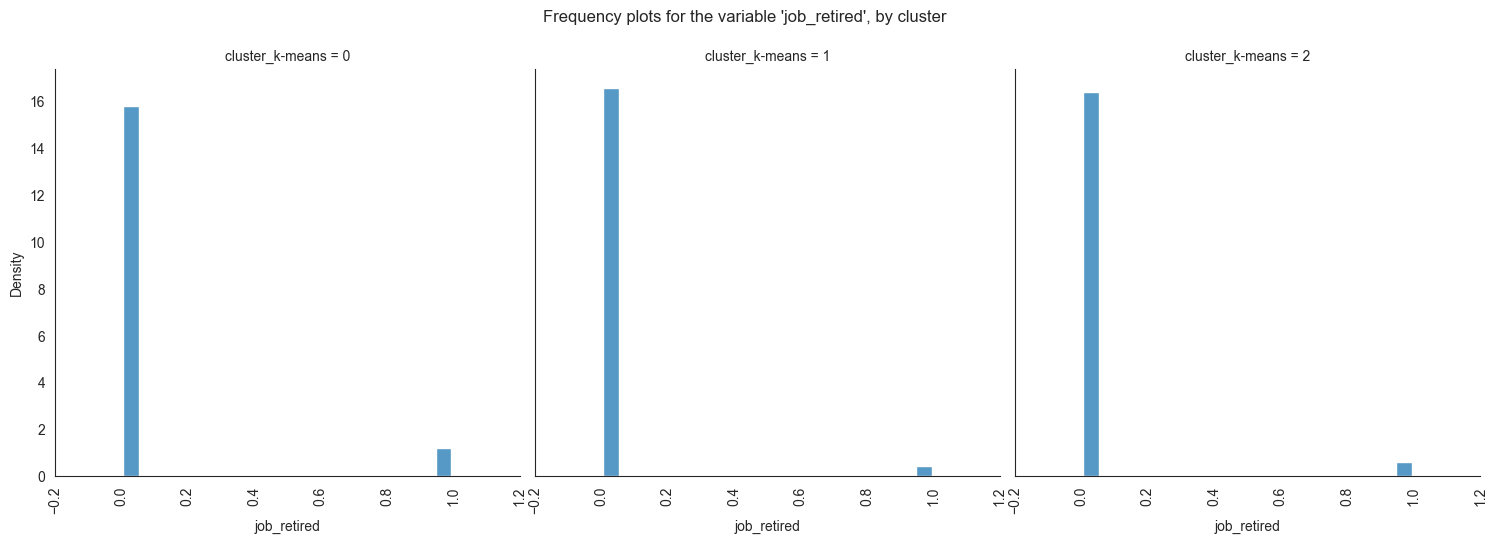

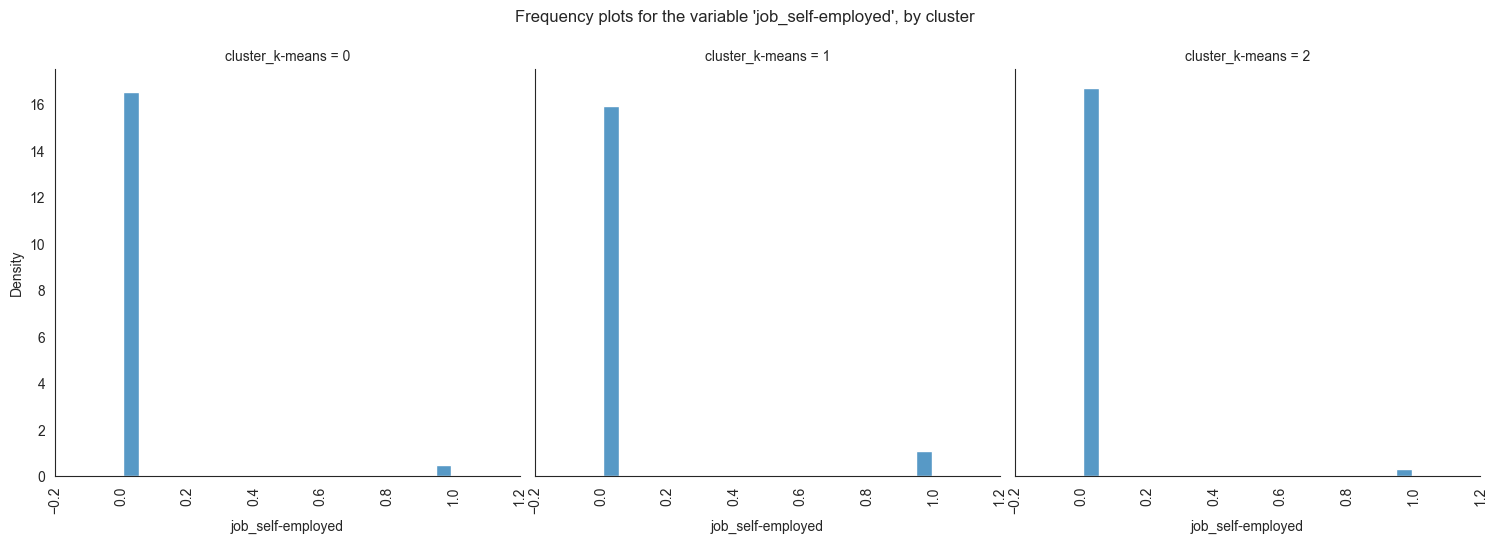

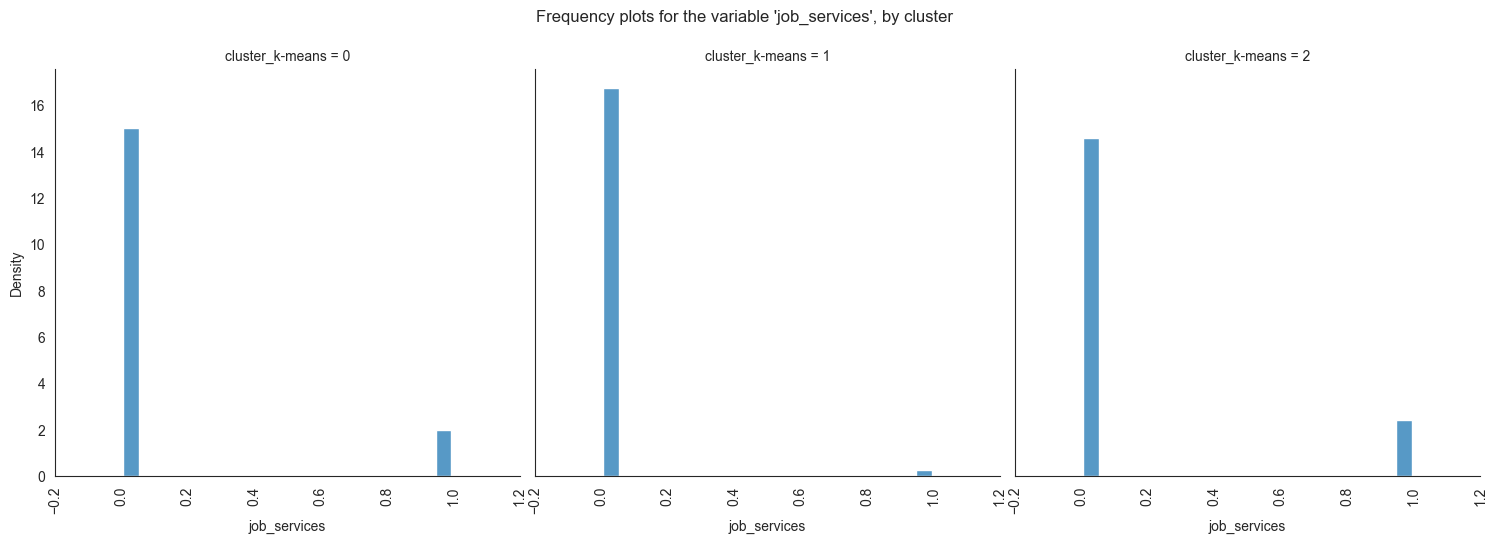

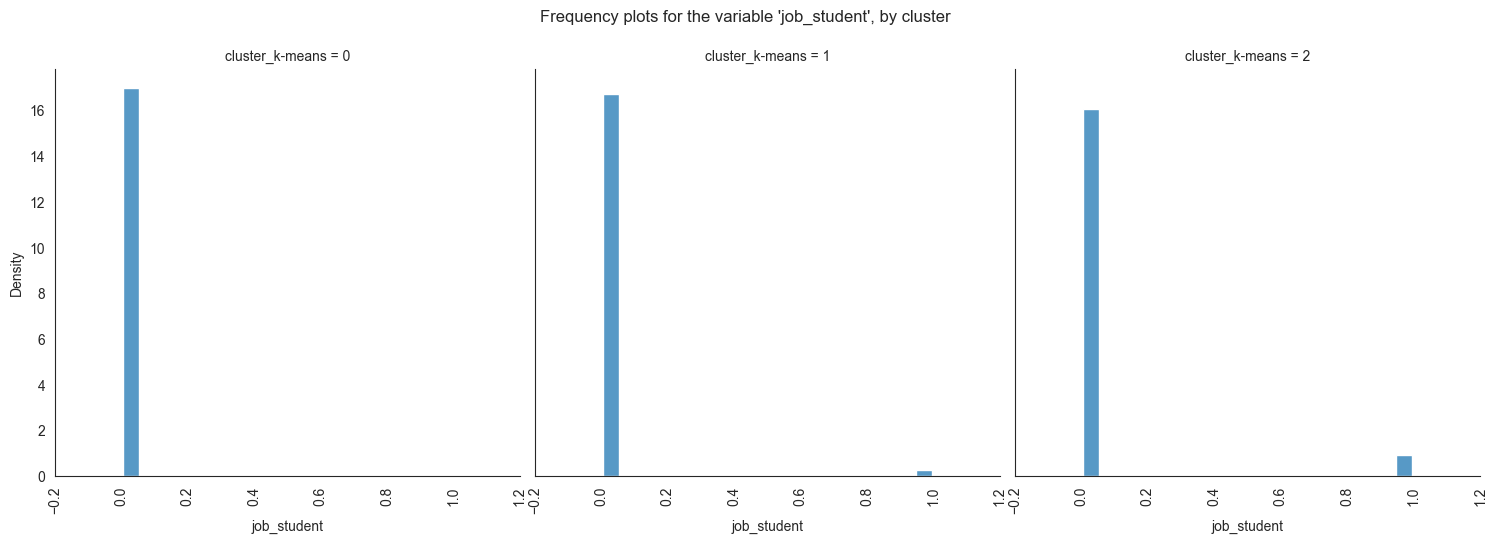

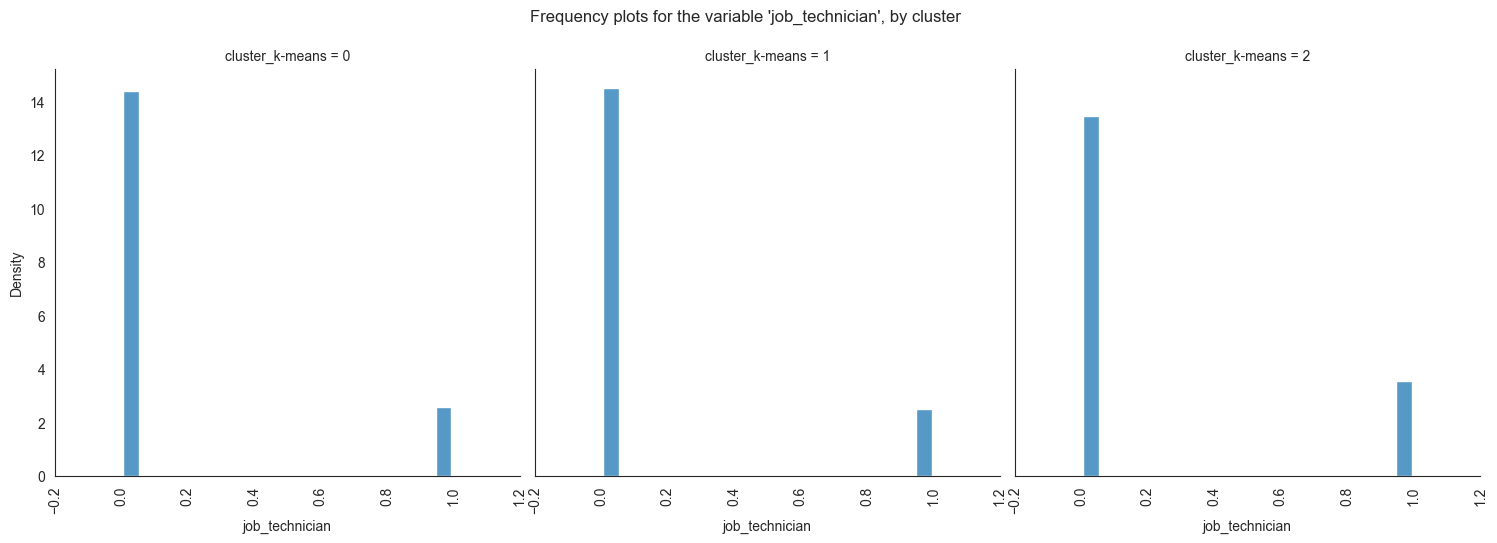

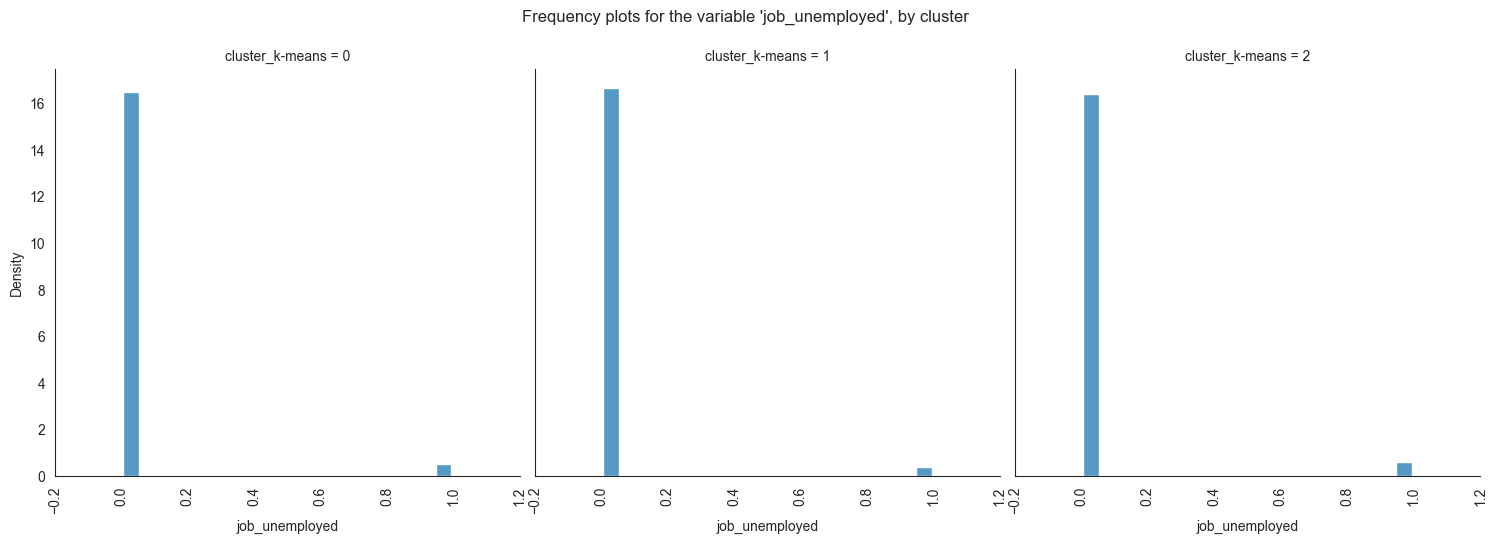

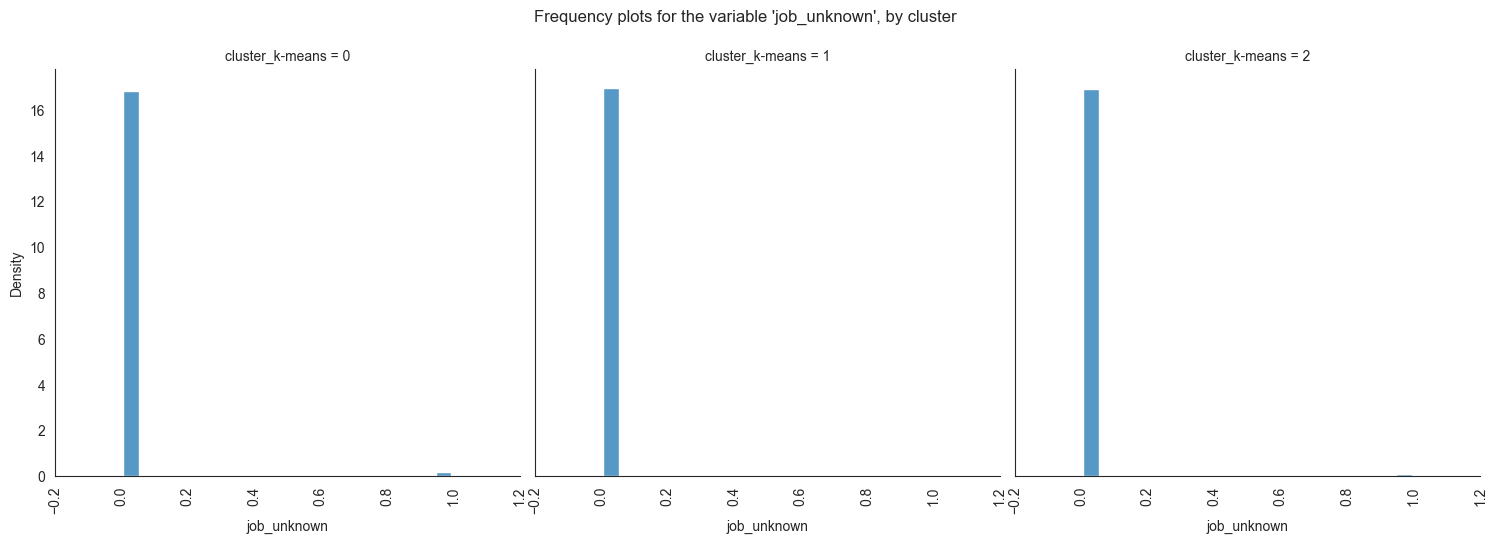

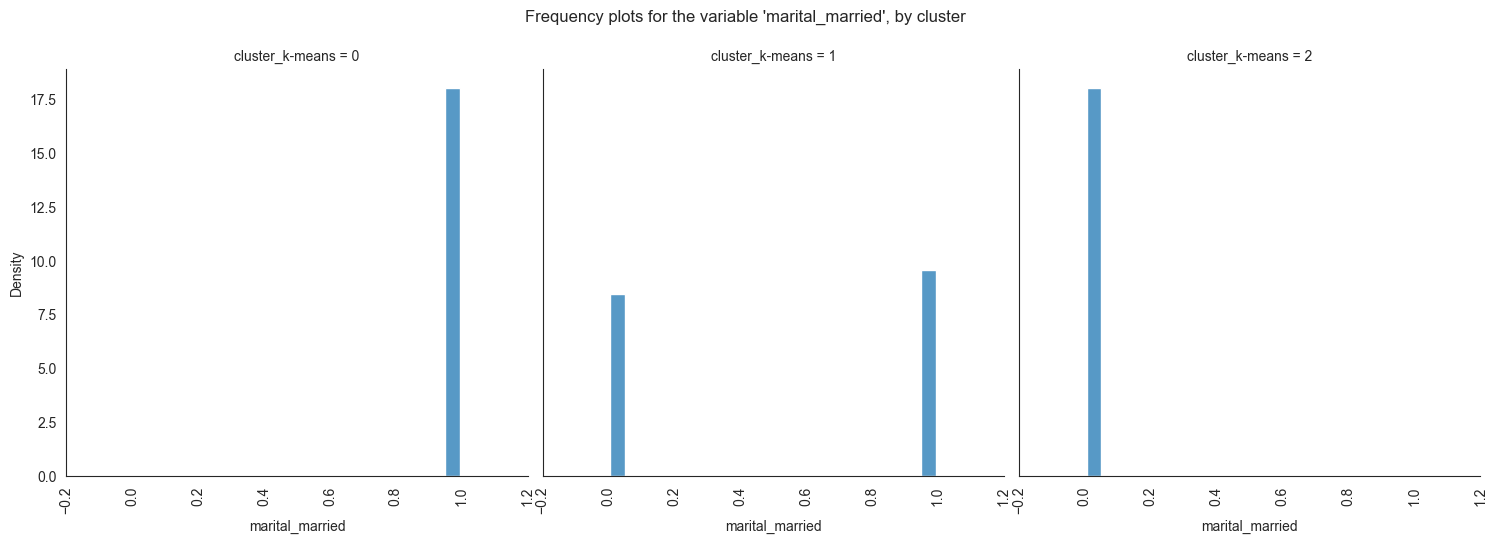

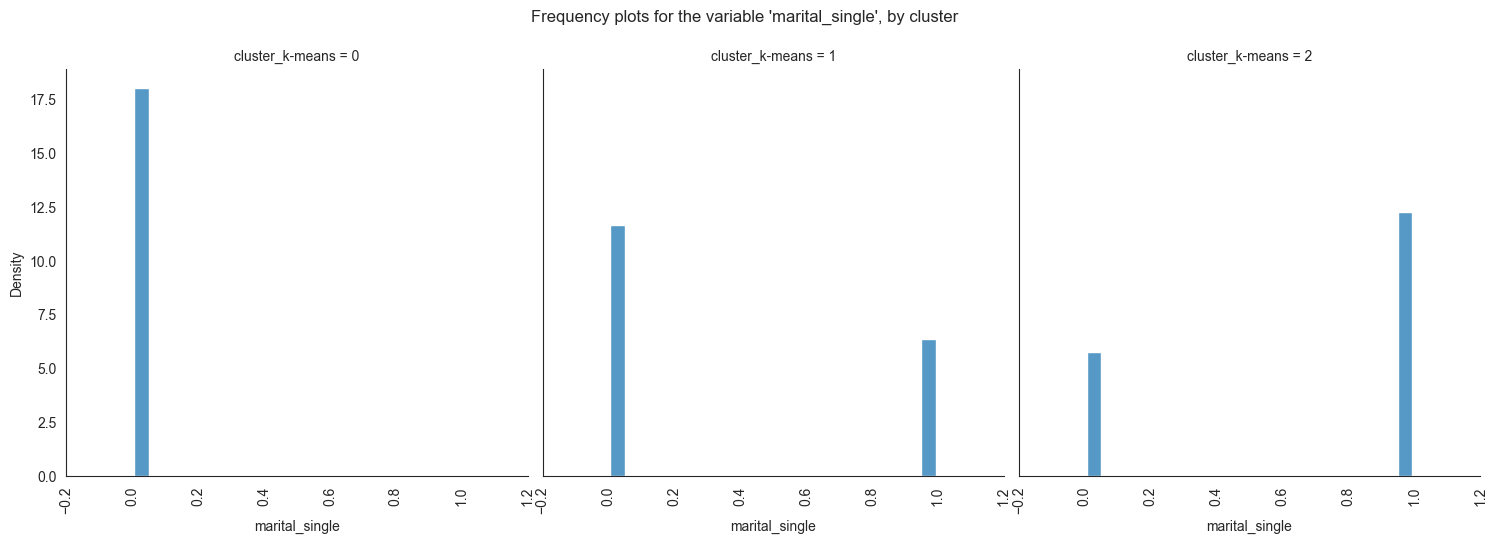

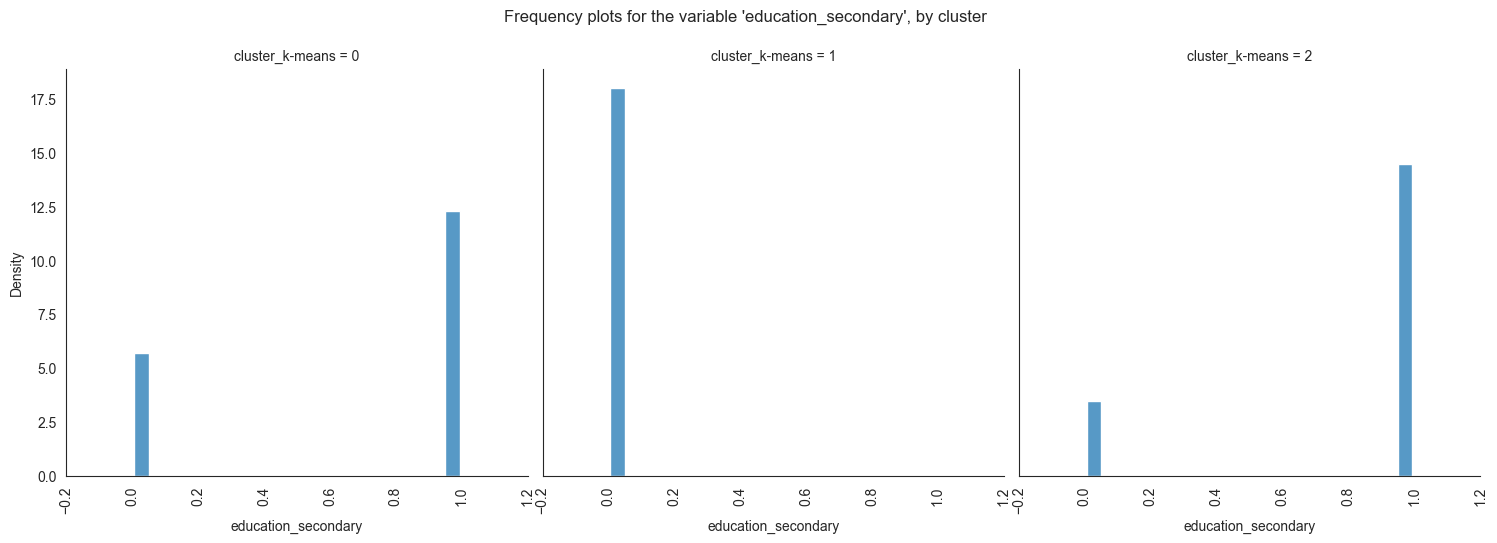

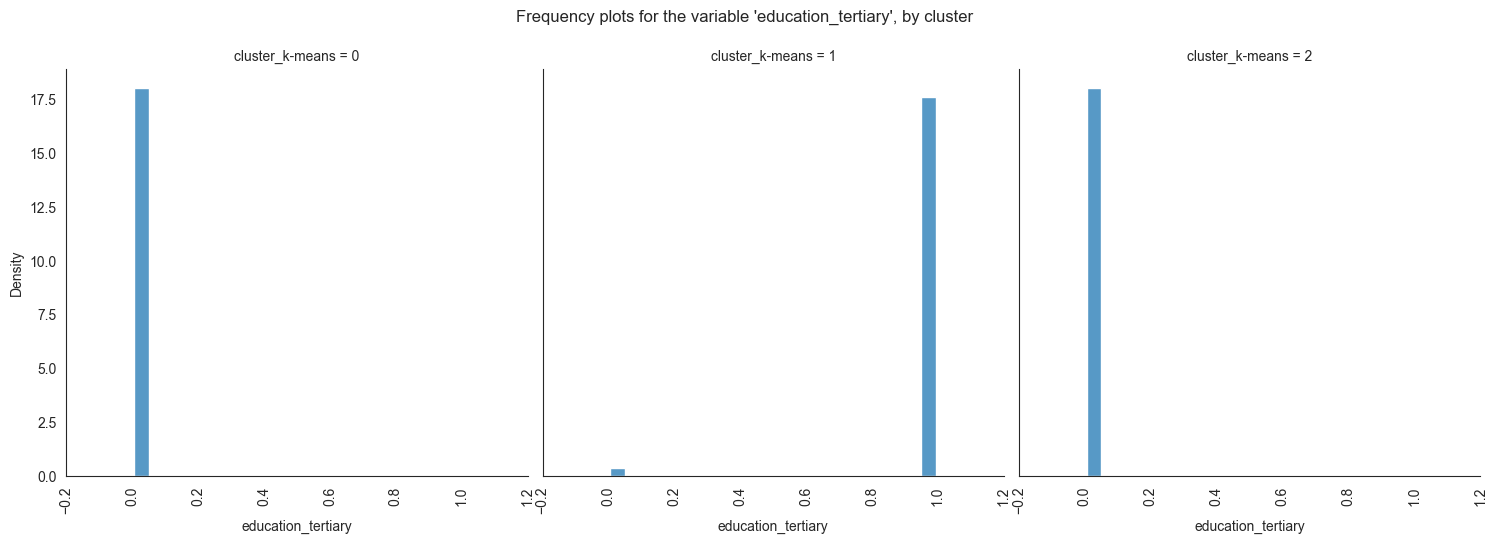

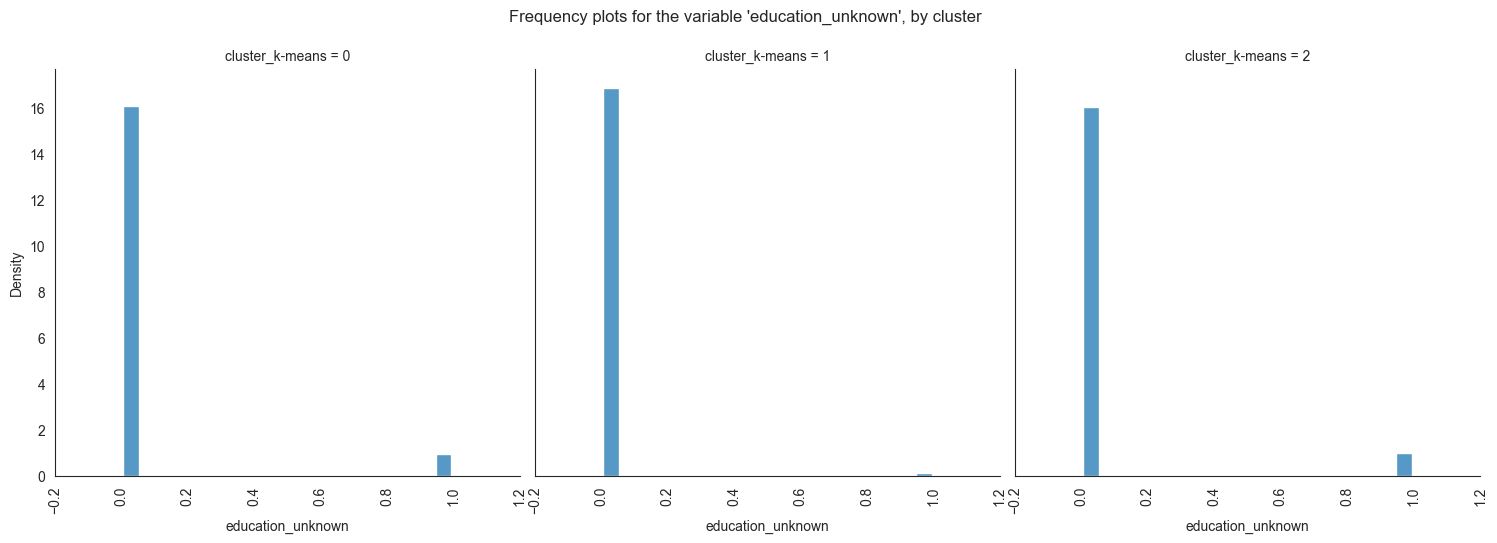

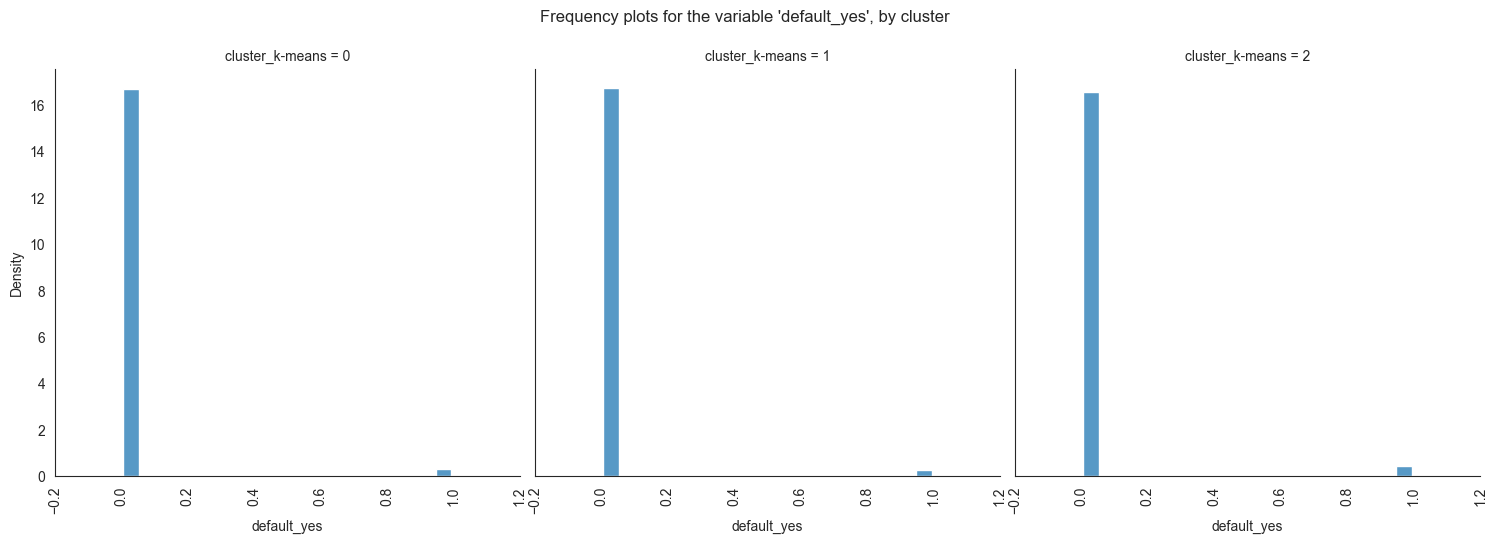

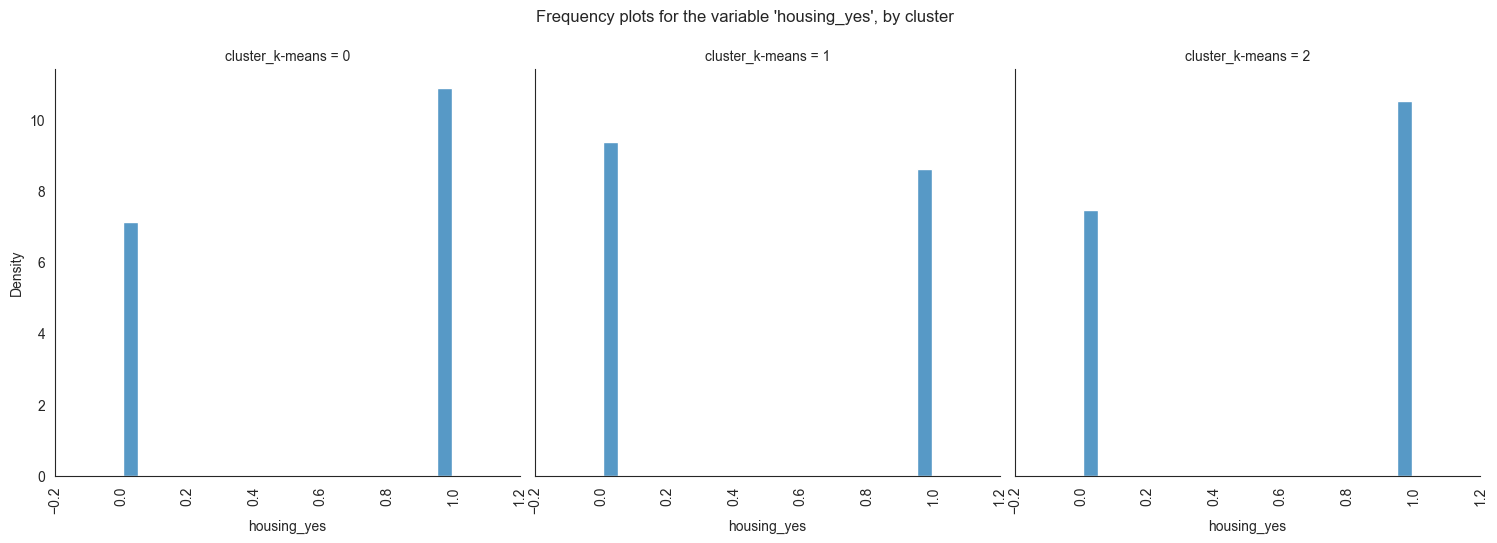

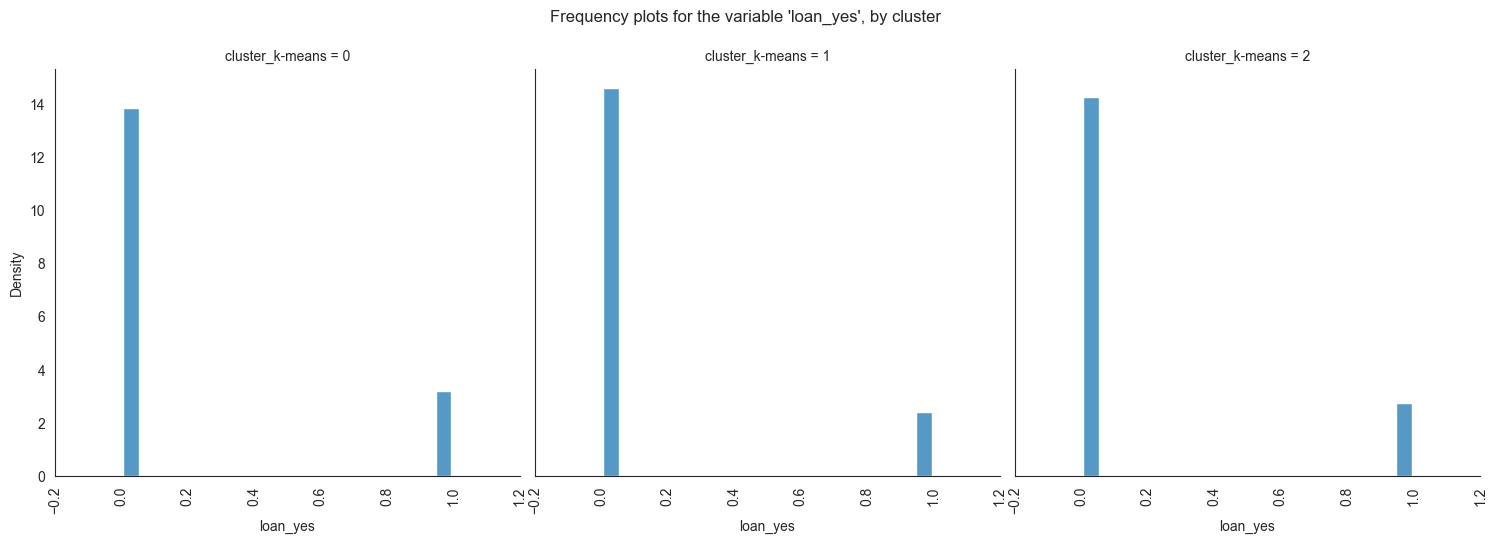

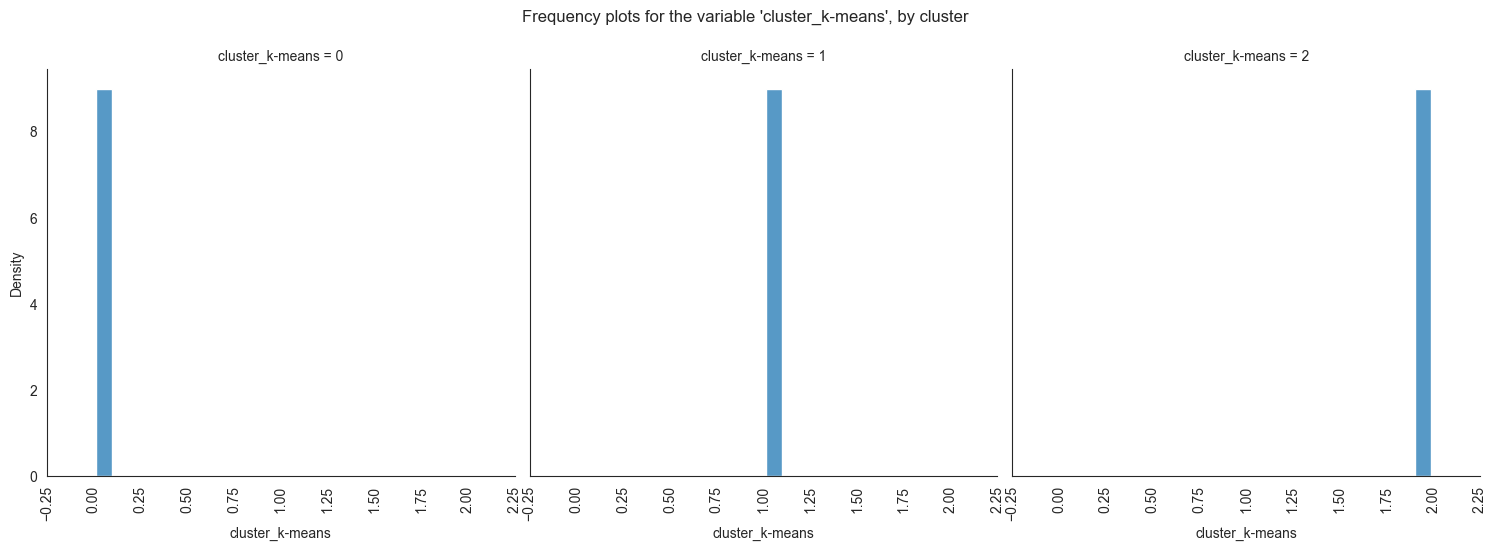

In [80]:
for column in df_kmeans.columns:
    g = sns.displot(data=df_kmeans, x=column, col='cluster_k-means', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(f"Frequency plots for the variable '{column}', by cluster", y=1.05)
    plt.show()

The provided image shows 3 frequency plots of the variables, by cluster. The x-axis represents the cluster number, and the y-axis represents the frequency of the variables within that cluster.

As you can see, the frequency of 'age' is highest for cluster 0, followed by cluster 1, and then cluster 2. This suggests that there are more 20-40 years old people in cluster 0, followed by 30-40 years old people in cluster 1, and then 40-50 years old people in cluster 2.

**Here is a more detailed explanation of the plot:** \
Cluster 0: This cluster has the highest frequency, at 22%. This suggests that there are a lot of 20-40 years old people in this cluster.
Cluster 1: This cluster has a frequency of 20%. This is lower than cluster 0, but it is still relatively high.
Cluster 2: This cluster has the lowest frequency, at 0%. This suggests that there are no 40-50 years old people in this cluster.

Overall, this plot shows that the variables are a good predictor of the cluster assignment. This means that we can use the variables to identify which cluster a new data point belongs to with a high degree of accuracy.

## Conclusion

### The differences between the clusters

In conclusion, this project has successfully addressed customers segmentation in banking sectors.

The findings from this project hold significant implications for Bank Marketing Campaign. This project not only contributes to the existing body of knowledge in, but it also provides practical solutions and recommendations.

The majority of clients in **cluster 0** are married, educated through elementary or secondary education, employed as technicians or blue-collar workers, have housing loans, and range in age from 30 to 60.
**In cluster 1**, the majority of consumers are between the ages of 20 and 40, single, educated up to the secondary or tertiary levels, work in administrative or blue-collar positions, and do not have house loans.
The majority of consumers in **cluster 2** are between the ages of 30 and 60, have managerial positions, are married, have completed postsecondary education, and do not have mortgage debt.

Thus, **cluster 2** is probably home to the largest percentage of clients who are positive that they need a term deposit and have one (or vice versa), followed by **cluster 1** and **cluster 0**. The bank should concentrate more on attracting customers in **clusters 0 and 1**, according to the findings of our clustering analysis. This has the potential to both lower campaign expenses and increase campaign effectiveness.